In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import from_levels_and_colors
import cartopy.crs as ccrs
import cartopy.feature as cf
from netCDF4 import Dataset
from wrf import (getvar, to_np, get_cartopy, latlon_coords, vertcross, ll_to_xy,
                 cartopy_xlim, cartopy_ylim, interpline, CoordPair, destagger, 
                 interplevel)

import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import cartopy.feature as cfe
import xarray as xr
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm

import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

In [26]:
# %%bash
# ls

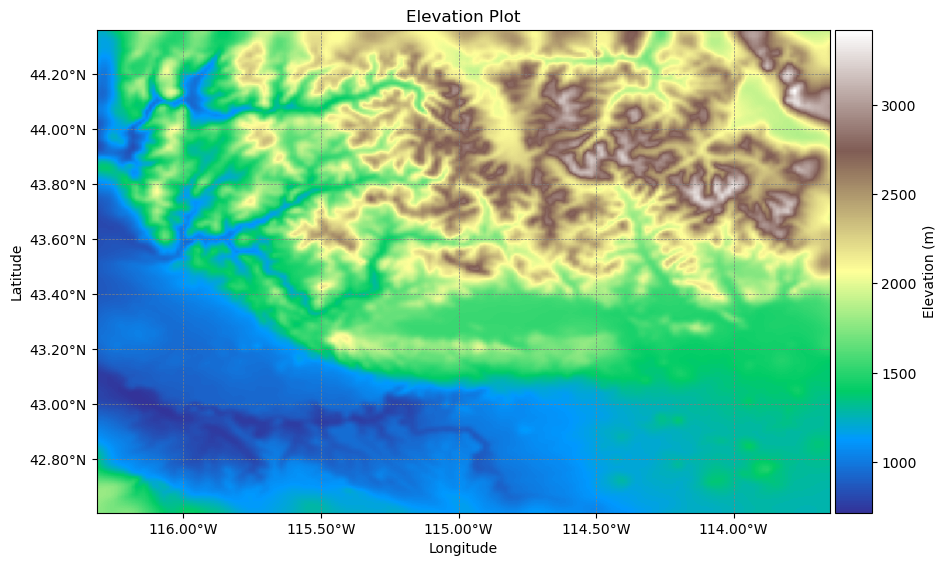

In [2]:


# Open the wrfout file
wrf_data = xr.open_dataset('wrfout_d02_2022-12-31_08:00:00')

# Extract the elevation variable
elevation = wrf_data['HGT'].isel(Time=0)  # Assuming 'HGT' is the elevation variable

# Extract latitude and longitude dimensions
lat = wrf_data['XLAT'].isel(Time=0)
lon = wrf_data['XLONG'].isel(Time=0)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(elevation, extent=(lon.min(), lon.max(), lat.min(), lat.max()), cmap='terrain', origin='lower', alpha=1.0)

#im = ax.imshow(elevation, extent=(lon.min(), lon.max(), lat.min(), lat.max()), cmap='terrain', origin='lower', norm=LogNorm())
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Elevation Plot')

# Modify latitude and longitude labels
lon_ticks = ax.get_xticks()
lat_ticks = ax.get_yticks()
lon_labels = [f'{abs(lon):.2f}°{"W" if lon < 0 else "E"}' for lon in lon_ticks]
lat_labels = [f'{abs(lat):.2f}°{"S" if lat < 0 else "N"}' for lat in lat_ticks]
ax.set_xticklabels(lon_labels)
ax.set_yticklabels(lat_labels)

# Add gridlines
ax.grid(color='gray', linestyle='--', linewidth=0.5)

# Create a colorbar with the same height as the plot
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(im, cax=cax, label='Elevation (m)')

# Save the plot to a file
plt.savefig('elevation_plot.pdf', dpi=300)

# Display the plot
plt.show()

In [24]:
%%bash
pwd

/bsuhome/stanleyakor/WRF-Analysis/WRF-PYTHON-TUTORIAL/day4_2


In [21]:
# combine location and filename
#ncfile = Dataset("wrfout_d01_2023-06-18_00:00:00")
# extract variables from wrf output
hgt = getvar(nc,"SNOW")  

latwrf = getvar(nc,"XLAT")           # latitude
lonwrf = getvar(nc,"XLONG")          

In [9]:
%%bash
cd ../day4/
pwd
ls

/bsuhome/stanleyakor/WRF-Analysis/WRF-PYTHON-TUTORIAL/day4
day4.ipynb
wrfout_d01_2023-06-18_00:00:00
wrfout_d01_2023-06-18_06:00:00
wrfout_d01_2023-06-18_12:00:00
wrfout_d02_2023-06-18_00:00:00
wrfout_d02_2023-06-18_01:00:00
wrfout_d02_2023-06-18_02:00:00
wrfout_d02_2023-06-18_03:00:00
wrfout_d02_2023-06-18_04:00:00
wrfout_d02_2023-06-18_05:00:00
wrfout_d02_2023-06-18_06:00:00
wrfout_d02_2023-06-18_07:00:00
wrfout_d02_2023-06-18_08:00:00
wrfout_d02_2023-06-18_09:00:00
wrfout_d02_2023-06-18_10:00:00
wrfout_d02_2023-06-18_11:00:00
wrfout_d02_2023-06-18_12:00:00


In [10]:
wrf_data = xr.open_dataset('/bsuhome/stanleyakor/WRF-Analysis/WRF-PYTHON-TUTORIAL/day4/wrfout_d02_2023-06-18_03:00:00')

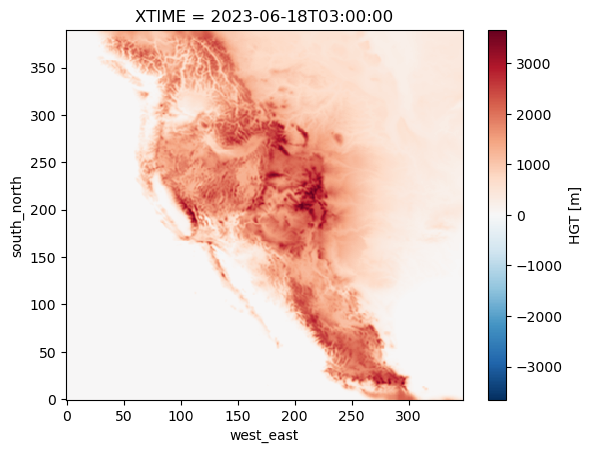

In [13]:
hgt=wrf_data["HGT"]
hgt.plot()